In [157]:
import pandas as pd
from tqdm import tqdm
from itertools import combinations
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [ ]:
data = "../data/"

In [26]:
f =  open("../data/diff/auburn/raw000/segement001.json")
# for x in f:
#     print(json.loads(x))
#     break
data = json.loads(f.read())
f.close()
data.keys()

dict_keys(['pixel', 'area', 'edge'])

In [27]:
pixel = data["pixel"]
area  = data["area"]
edge  = data["edge"]

In [128]:
def annot_max(x,y, ax=None):
    xmax = x[np.argmin(y)]
    ymax = min(y)
    text= "x={:.2f}, y={:.2f}%".format(xmax, ymax*100)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="bottom")
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax/(xmax+x[-8]),ymax + 0.1), **kw)



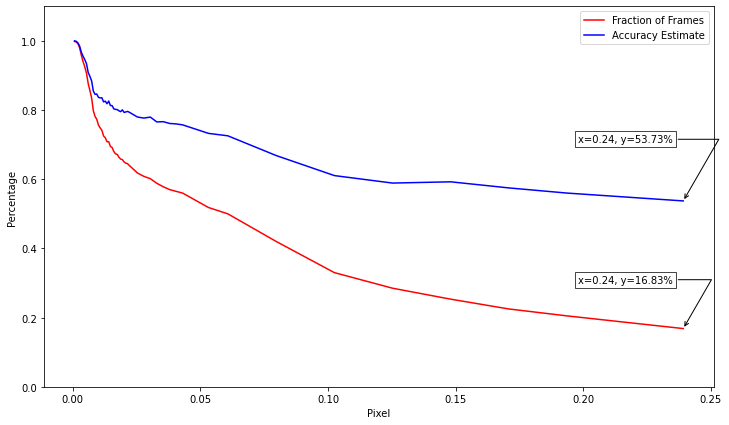

In [129]:
x  = [float(k) for k in pixel["result"].keys()]
y1 = [float(pixel["result"][str(k)]['fraction']) for k in x]
y2 = [float(pixel["result"][str(k)]['estimation']) for k in x]


fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, y1, color = 'red', label = 'Fraction of Frames')
ax.plot(x, y2, color = 'blue', label = 'Accuracy Estimate')
annot_max(x, y1, ax)
annot_max(x, y2, ax)
ax.set_ylim(0.0,1.1)
ax.set_xlabel("Pixel")
ax.set_ylabel("Percentage")
ax.legend(loc = 'upper right')
plt.show()

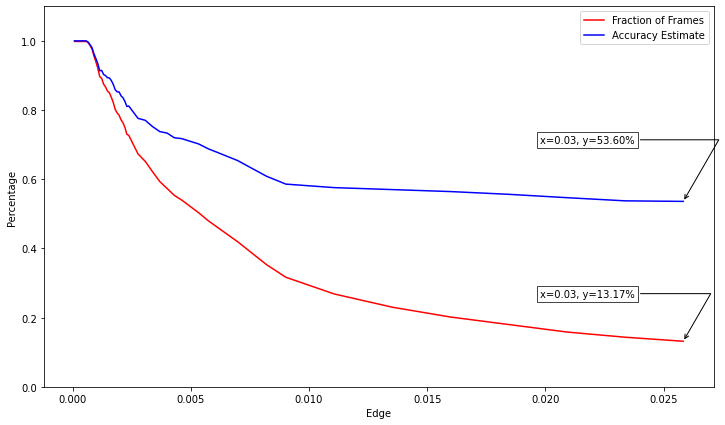

In [130]:
x  = [float(k) for k in edge["result"].keys()]
y1 = [float(edge["result"][str(k)]['fraction']) for k in x]
y2 = [float(edge["result"][str(k)]['estimation']) for k in x]

ticks = ['%.2E' % i for i in x[10:]]


fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, y1, color = 'red', label = 'Fraction of Frames')
ax.plot(x, y2, color = 'blue', label = 'Accuracy Estimate')
annot_max(x, y1, ax)
annot_max(x, y2, ax)
ax.set_ylim(0.0,1.1)
ax.set_xlabel("Edge")
ax.set_ylabel("Percentage")
ax.legend(loc = 'upper right')
plt.show()

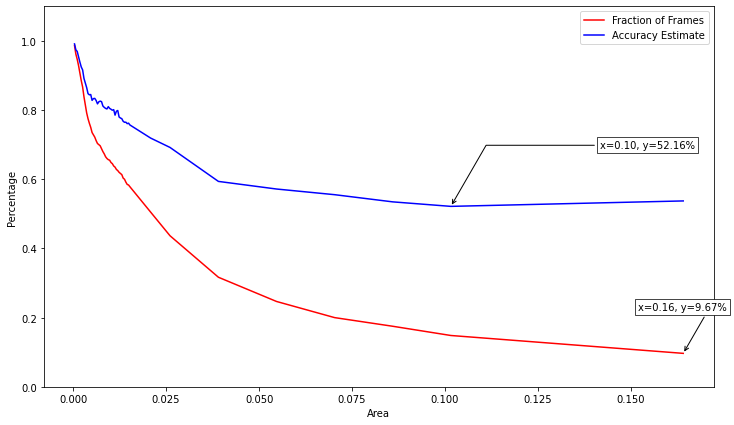

In [131]:
x  = [float(k) for k in area["result"].keys()]
y1 = [float(area["result"][str(k)]['fraction']) for k in x]
y2 = [float(area["result"][str(k)]['estimation']) for k in x]

ticks = ['%.2E' % i for i in x[10:]]


fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, y1, color = 'red', label = 'Fraction of Frames')
ax.plot(x, y2, color = 'blue', label = 'Accuracy Estimate')
annot_max(x, y1, ax)
annot_max(x, y2, ax)
ax.set_ylim(0.0,1.1)
ax.set_xlabel("Area")
ax.set_ylabel("Percentage")
ax.legend(loc = 'upper right')
plt.show()

In [156]:
d = {}
for i in range(1, 600):
    d[i] = 0
for k in pixel["result"].keys():
    for f in pixel["result"][k]['selected_frames']:
        d[f] += 1

d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
count_df = pd.DataFrame(d.items(), columns=["frames", "count"])
# fig, ax = plt.subplots(figsize=(12, 7))
# ax = count_df.plot.bar(y='count', rot=0, figsize=(23,10))
# #annot_max(x, y1, ax)

# ax.set_xlabel("Area")
# ax.set_ylabel("Percentage")
# ax.legend(loc = 'upper right')
# plt.show()
count_df

,frames,count
0,1,50
1,8,50
2,10,50
3,12,50
4,20,50
...,...,...
594,576,7
595,569,6
596,589,6
597,584,5


In [159]:
f =  open("../data/inference/auburn/raw000/segement001.json")
# for x in f:
#     print(json.loads(x))
#     break
data = json.loads(f.read())
f.close()

In [162]:
data['8']

{'num_detections': 9,
 'detection_boxes': [[539.107666015625,
   106.84257507324219,
   602.7697143554688,
   155.53184509277344],
  [426.0491943359375,
   125.79744720458984,
   492.0653991699219,
   184.2204132080078],
  [853.2372436523438, 371.2274169921875, 961.0360107421875, 476.5633239746094],
  [452.0397644042969, 512.1824951171875, 611.3567504882812, 681.2727661132812],
  [456.93359375, 272.1532897949219, 560.2678833007812, 363.3382263183594],
  [612.3154296875, 59.62464141845703, 646.1638793945312, 84.55451965332031],
  [593.7483520507812, 3.413600444793701, 621.8759765625, 17.452499389648438],
  [892.4685668945312, 521.8936767578125, 1041.359375, 703.59033203125],
  [501.7673034667969, 478.236572265625, 593.990966796875, 532.0720825195312]],
 'detection_scores': [0.9873760938644409,
  0.9795368313789368,
  0.9739950895309448,
  0.9700337052345276,
  0.9674502015113831,
  0.9545891880989075,
  0.9483765363693237,
  0.6971834301948547,
  0.6465657353401184],
 'detection_classes

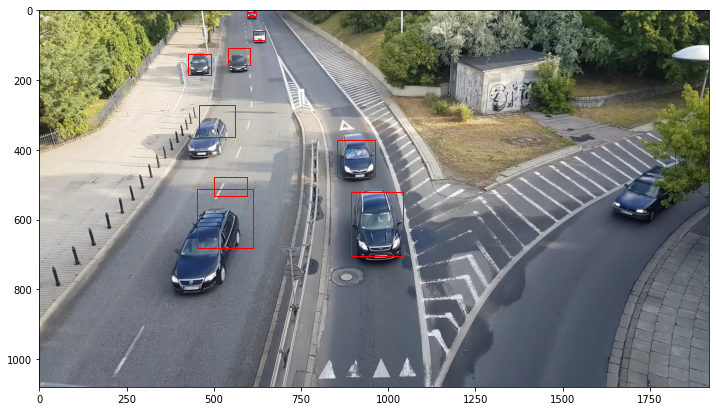

In [164]:
im = Image.open("../0000000008.png")

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 7))

# Display the image
ax.imshow(im)

n = data['8']['num_detections']
boxes = data['8']['detection_boxes']
for i in range(n):
    # Create a Rectangle patch
    rect = patches.Rectangle((boxes[i][0], boxes[i][1]), boxes[i][2] - boxes[i][0], boxes[i][3] - boxes[i][1], linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

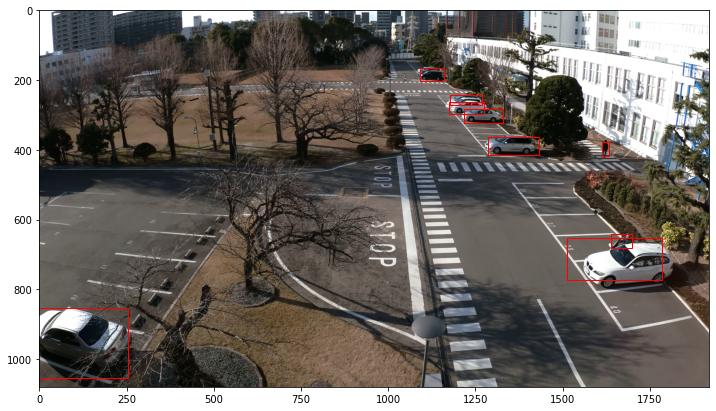

In [165]:
im = Image.open("../0000000587.png")

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 7))

# Display the image
ax.imshow(im)

n = data['587']['num_detections']
boxes = data['587']['detection_boxes']
for i in range(n):
    # Create a Rectangle patch
    rect = patches.Rectangle((boxes[i][0], boxes[i][1]), boxes[i][2] - boxes[i][0], boxes[i][3] - boxes[i][1], linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()